In [2]:
!pwd

/content


In [3]:
from google.colab import drive
drive.mount('/content/drive')

KeyboardInterrupt: ignored

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import warnings
warnings.filterwarnings('ignore')
import missingno
from sklearn.preprocessing import LabelEncoder
import re
from sklearn.metrics import accuracy_score

# from matplotlib import font_manager, rc
# font_path = "/content/drive/MyDrive/L1/Notebooks/dataset/malgun.ttf"
# font_name = font_manager.FontProperties(fname=font_path).get_name()
# rc('font', family=font_name)

In [ ]:
%pwd

'/content'

In [4]:
ddf = pd.read_pickle('/content/drive/MyDrive/L1/Notebooks/dataset/dataset_for_analysis.pkl')

NameError: ignored

In [ ]:
ddf.head()

,spent_less,cloth_lingerie_purch_diff,cloth_sports_purch_diff,cloth_etc_purch_diff,cloth_business_purch_diff,hobby_media_purch_diff,hobby_pet_purch_diff,hobby_outdoor_purch_diff,hobby_sports_purch_diff,hobby_health_purch_diff,hobby_instex_purch_diff,cloth_women_purch_diff,hobby_golf_purch_diff,A_purch_diff,B_purch_diff,Recency,cloth_highvalue,cloth_lowvalue,cloth_mediumvalue,hobby_highvalue,hobby_lowvalue,hobby_mediumvalue,CLOTH_MEN_PERDAY_VISITING,CLOTH_CASUAL_PERDAY_VISITING,CLOTH_ETC_PERDAY_VISITING,CLOTH_BUSINESS_PERDAY_VISITING,CLOTH_LINGERIE_PERDAY_VISITING,CLOTH_SPORTS_PERDAY_VISITING,CLOTH_WOMEN_PERDAY_VISITING,HOBBY_PET_PERDAY_VISITING,HOBBY_GOLF_PERDAY_VISITING,HOBBY_MEDIA_PERDAY_VISITING,HOBBY_CHILD_PERDAY_VISITING,HOBBY_HEALTH_PERDAY_VISITING,HOBBY_OUTDOOR_PERDAY_VISITING,HOBBY_INSTEX_PERDAY_VISITING,MEMBERSHIP_CAT_2,MEMBERSHIP_CAT_3
0,1,0.000000,0.0,-0.000051,-0.000102,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,-0.000050,0.000000,29,3.0,0.0,0.0,0.0,0.0,0.0,-0.0659,0.1099,-0.0110,0.000,0.0000,0.0,0.0,0.000,0.0000,0.0,0.0,0.0,0.0,0.0,0,0
1,0,0.001979,0.0,-0.000142,0.000000,0.0,-0.00036,0.0,0.0,0.0,0.0,0.0,-0.000468,0.000032,0.000000,2,2.0,0.0,0.0,5.0,2.0,0.0,0.0000,0.0330,-0.0330,0.000,0.0219,0.0,0.0,-0.011,-0.0549,0.0,0.0,0.0,0.0,0.0,0,0
2,1,0.000000,0.0,0.000000,0.000253,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,-0.000075,0.000025,0.000046,9,1.0,0.0,0.0,1.0,0.0,0.0,0.0000,-0.0439,0.0000,0.033,0.0000,0.0,0.0,0.000,-0.0110,0.0,0.0,0.0,0.0,0.0,0,0
3,0,0.000350,0.0,0.000037,-0.000011,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000012,0.000058,0.000050,25,12.0,0.0,4.0,1.0,0.0,0.0,0.0110,0.0879,0.0219,-0.011,0.0659,0.0,0.0,0.000,0.0110,0.0,0.0,0.0,0.0,0.0,0,0
4,0,0.000114,0.0,-0.000813,-0.000187,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,-0.000003,0.000233,0.000000,2,5.0,0.0,0.0,1.0,0.0,0.0,-0.0110,0.0440,-0.0769,-0.022,0.0110,0.0,0.0,0.000,-0.0110,0.0,0.0,0.0,0.0,0.0,0,0


In [ ]:
# label, feature 분리
y_labels = ddf['spent_less']
X_features= ddf.drop('spent_less', axis=1)

In [ ]:
# 비율확인
print(ddf['spent_less'].value_counts())
unsatisfied_cnt = ddf[ddf['spent_less'] == 1].spent_less.count()
total_cnt = ddf.spent_less.count()
print('spent_less 비율은 {0:.2f}'.format((unsatisfied_cnt / total_cnt)))

1    8818
0    7477
Name: spent_less, dtype: int64
spent_less 비율은 0.54


In [ ]:
# 학습, 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels,
                                                    test_size=0.2, random_state=0) # stratify=y_labels?
train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape , X_test.shape))

print(' 학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

학습 세트 Shape:(13036, 37), 테스트 세트 Shape:(3259, 37)
 학습 세트 레이블 값 분포 비율
1    0.54035
0    0.45965
Name: spent_less, dtype: float64

 테스트 세트 레이블 값 분포 비율
1    0.544339
0    0.455661
Name: spent_less, dtype: float64


In [ ]:
from lightgbm import LGBMClassifier

evals = [(X_test, y_test)]
lgb_wrapper = LGBMClassifier(n_estimators=10)

# 조기중단 수행
lgb_wrapper.fit(X_train,y_train, early_stopping_rounds=10,eval_set=evals, \
                eval_metric='logloss',verbose=True)
w_preds = lgb_wrapper.predict(X_test)
w_preds_proba = lgb_wrapper.predict_proba(X_test)[:,1]

[1]	valid_0's binary_logloss: 0.642986	valid_0's binary_logloss: 0.642986
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's binary_logloss: 0.605219	valid_0's binary_logloss: 0.605219
[3]	valid_0's binary_logloss: 0.573707	valid_0's binary_logloss: 0.573707
[4]	valid_0's binary_logloss: 0.546879	valid_0's binary_logloss: 0.546879
[5]	valid_0's binary_logloss: 0.524183	valid_0's binary_logloss: 0.524183
[6]	valid_0's binary_logloss: 0.504778	valid_0's binary_logloss: 0.504778
[7]	valid_0's binary_logloss: 0.48804	valid_0's binary_logloss: 0.48804
[8]	valid_0's binary_logloss: 0.473236	valid_0's binary_logloss: 0.473236
[9]	valid_0's binary_logloss: 0.460691	valid_0's binary_logloss: 0.460691
[10]	valid_0's binary_logloss: 0.449757	valid_0's binary_logloss: 0.449757
Did not meet early stopping. Best iteration is:
[10]	valid_0's binary_logloss: 0.449757	valid_0's binary_logloss: 0.449757


In [ ]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=500)

evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc", eval_set=evals,
                verbose=True)
w_preds = lgbm_clf.predict(X_test)
w_preds_proba = lgbm_clf.predict_proba(X_test)[:,1]

[1]	valid_0's auc: 0.890351	valid_0's binary_logloss: 0.642986
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.895101	valid_0's binary_logloss: 0.605219
[3]	valid_0's auc: 0.89891	valid_0's binary_logloss: 0.573707
[4]	valid_0's auc: 0.901832	valid_0's binary_logloss: 0.546879
[5]	valid_0's auc: 0.902994	valid_0's binary_logloss: 0.524183
[6]	valid_0's auc: 0.903704	valid_0's binary_logloss: 0.504778
[7]	valid_0's auc: 0.904683	valid_0's binary_logloss: 0.48804
[8]	valid_0's auc: 0.905853	valid_0's binary_logloss: 0.473236
[9]	valid_0's auc: 0.906704	valid_0's binary_logloss: 0.460691
[10]	valid_0's auc: 0.907652	valid_0's binary_logloss: 0.449757
[11]	valid_0's auc: 0.908542	valid_0's binary_logloss: 0.44001
[12]	valid_0's auc: 0.908946	valid_0's binary_logloss: 0.431747
[13]	valid_0's auc: 0.90935	valid_0's binary_logloss: 0.424272
[14]	valid_0's auc: 0.909789	valid_0's binary_logloss: 0.417824
[15]	valid_0's auc: 0.910263	valid_0's binary_logloss:

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
confusion_matrix, f1_score, roc_auc_score

def get_clf_eval(y_test, pred, pred_proba):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    # ROC AUC는 pred 대신 pred_proba
    roc_score=roc_auc_score(y_test,pred_proba) # pred_proba

    print('오차행렬')
    print(confusion)
    print('정확도:{0:.4f}, 정밀도:{1:.4f}, 재현율:{2:.4f}, \
    f1 score:{3:.4f}, ROC AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_score))
get_clf_eval(y_test, w_preds, w_preds_proba)

오차행렬
[[1218  267]
 [ 241 1533]]
정확도:0.8441, 정밀도:0.8517, 재현율:0.8641,     f1 score:0.8579, ROC AUC:0.9196


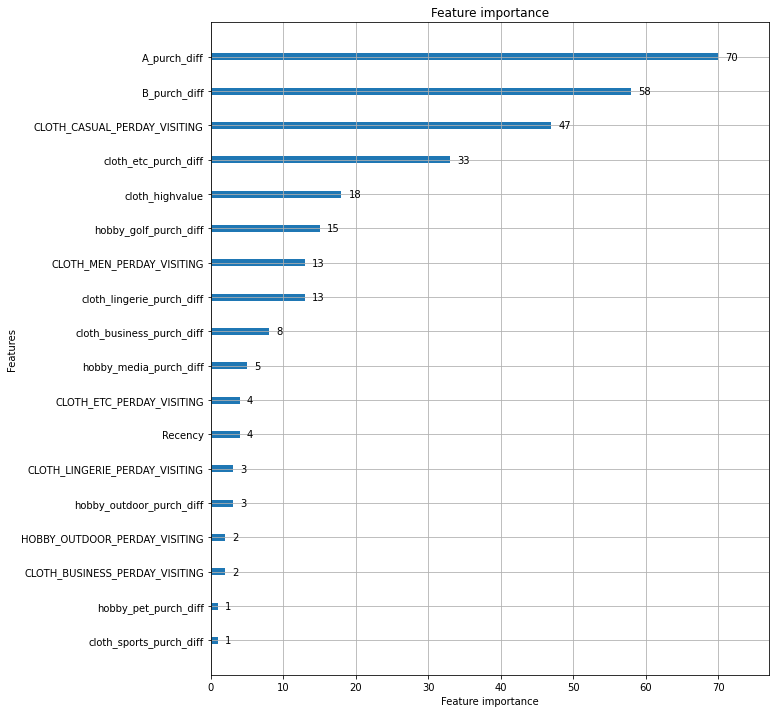

In [ ]:
from lightgbm import plot_importance
fig, ax = plt.subplots(figsize = (10,12))
plot_importance(lgb_wrapper, ax=ax)

최적 파라미터 찾기

In [ ]:
from sklearn.model_selection import GridSearchCV

LGBM_clf = LGBMClassifier(n_estimators=200)

params = {'num_leaves': [20, 32,64],
         'max_depth':[128,160],
         'min_child_samples':[60,100],
         'subsample':[0.8,1]}
gridcv = GridSearchCV(LGBM_clf,param_grid=params)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric='auc', \
                      eval_set=[(X_train,y_train),(X_test,y_test)])
print('GCV 최적 파라미터:', gridcv.best_params_)
lgbm_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1], average='macro')
print('AUC:{0:.4f}'.format(lgbm_roc_score))

Streaming output truncated to the last 5000 lines.
[50]	valid_0's auc: 0.938835	valid_0's binary_logloss: 0.318158	valid_1's auc: 0.916714	valid_1's binary_logloss: 0.364304
[51]	valid_0's auc: 0.939135	valid_0's binary_logloss: 0.317235	valid_1's auc: 0.916787	valid_1's binary_logloss: 0.364088
[52]	valid_0's auc: 0.939428	valid_0's binary_logloss: 0.316407	valid_1's auc: 0.916905	valid_1's binary_logloss: 0.36375
[53]	valid_0's auc: 0.939706	valid_0's binary_logloss: 0.31566	valid_1's auc: 0.916918	valid_1's binary_logloss: 0.363743
[54]	valid_0's auc: 0.940063	valid_0's binary_logloss: 0.314806	valid_1's auc: 0.917079	valid_1's binary_logloss: 0.363242
[55]	valid_0's auc: 0.940227	valid_0's binary_logloss: 0.314244	valid_1's auc: 0.916997	valid_1's binary_logloss: 0.363343
[56]	valid_0's auc: 0.940497	valid_0's binary_logloss: 0.313486	valid_1's auc: 0.917034	valid_1's binary_logloss: 0.363125
[57]	valid_0's auc: 0.9407	valid_0's binary_logloss: 0.31289	valid_1's auc: 0.917053	valid

In [ ]:
# from lightgbm import LGBMClassifier

# lgbm_clf = LGBMClassifier(n_estimators=200,
#                           max_depth=128, min_child_samples = 100, num_leaves = 32, subsample= 0.8)

# evals = [(X_test, y_test)]
# lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc", eval_set=evals,
#                 verbose=True)
# get_clf_eval(y_test, w_preds, w_preds_proba)

# 새 섹션